In [34]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from tensorflow.keras.preprocessing.text import Tokenizer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle

In [35]:
df = pd.read_csv('/Users/marikhomeriki/code/marikhomeriki/raw_data/data_dishoom.csv', header=None)




In [36]:
df= df.rename({1: 'text', 2: 'score'}, axis = 1)

In [37]:
df = df.dropna()

In [38]:
df.head()

,0,text,score
1,0.0,Hundreds of happy customers come through every...,5
2,1.0,We came for breakfast on a Monday so we were a...,4
3,2.0,Have been wanting to go to Dishoom for years a...,4
4,3.0,The best Indian food in London!This is my 3rd ...,5
5,4.0,I'm sure there's not much more I could say bec...,5


In [39]:
df['score'] = df['score'].astype(int)

In [40]:
df_negative = df[df.score < 4]

In [41]:
pos_reviews = df.text
neg_reviews = df_negative.text

In [42]:
pos_reviews = pd.DataFrame(pos_reviews)
neg_reviews = pd.DataFrame(neg_reviews)

In [43]:
def cleaning(sentence):
    
    # Basic cleaning
    sentence = sentence.strip() ## remove whitespaces
    sentence = sentence.lower() ## lowercase 
    sentence = ''.join(char for char in sentence if not char.isdigit()) ## remove numbers
    
    # Advanced cleaning
    for punctuation in string.punctuation:
        sentence = sentence.replace(punctuation, '') ## remove punctuation
    
    tokenized_sentence = word_tokenize(sentence) ## tokenize 
    stop_words = set(stopwords.words('english')) ## define stopwords
    
    tokenized_sentence_cleaned = [ ## remove stopwords
        w for w in tokenized_sentence if not w in stop_words
    ]

    lemmatized = [
        WordNetLemmatizer().lemmatize(word, pos = "v") 
        for word in tokenized_sentence_cleaned
    ]
    
    cleaned_sentence = ' '.join(word for word in lemmatized)
    
    return cleaned_sentence

In [44]:
pos_reviews_cleaned = pos_reviews["text"].apply(cleaning)
neg_reviews_cleaned = neg_reviews["text"].apply(cleaning)
pos_reviews_cleaned = pd.DataFrame(pos_reviews_cleaned)
neg_reviews_cleaned = pd.DataFrame(neg_reviews_cleaned)

In [45]:
vectorizer_pos = TfidfVectorizer(ngram_range = (1,2), 
                             min_df=0.01, 
                             max_df = 0.05).fit(pos_reviews_cleaned.text)

In [46]:
vectorizer = TfidfVectorizer(ngram_range = (1,2), 
                             min_df=0.01, 
                             max_df = 0.05)
with open('vectorizer.pk', 'wb') as fin:
    pickle.dump(vectorizer, fin)

In [47]:
vectorizer_neg = TfidfVectorizer(ngram_range = (1,1), 
                             min_df=0.01, 
                             max_df = 0.05).fit(neg_reviews_cleaned.text)

In [48]:
vectors_pos = pd.DataFrame(vectorizer_pos.transform(pos_reviews_cleaned.text).toarray(),
                       columns = vectorizer_pos.get_feature_names_out())
vectors_pos.head()

,able,absolutely amaze,absolutely delicious,absolutely worth,accommodate,add,advance,advice,afternoon,ago,...,years,yelp,yelp review,yes,yet,yogurt,youll,youre london,yum,yummy
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.170288,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.172933,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
vectors_neg = pd.DataFrame(vectorizer_neg.transform(neg_reviews_cleaned.text).toarray(),
                       columns = vectorizer_neg.get_feature_names_out())
vectors_neg.head()

,able,accept,acceptable,access,accompany,acquaintances,acquire,across,add,advance,...,wrong,xacuti,yea,yellow,yelp,yes,yesterday,yet,yogurt,youve
0,0.0,0.217998,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.228622,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.160481,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
sum_tfidf_pos = vectors_pos.sum(axis = 0)
sum_tfidf_pos

able                    3.177075
absolutely amaze        1.822035
absolutely delicious    3.220629
absolutely worth        1.285705
accommodate             3.431788
                          ...   
yogurt                  2.288774
youll                   2.420538
youre london            1.199586
yum                     3.355010
yummy                   2.877039
Length: 1071, dtype: float64

In [51]:
sum_tfidf_neg = vectors_neg.sum(axis = 0)
sum_tfidf_neg

able          0.093633
accept        0.217998
acceptable    0.148302
access        0.154344
accompany     0.128963
                ...   
yes           0.320553
yesterday     0.421940
yet           0.189344
yogurt        0.115226
youve         0.242383
Length: 729, dtype: float64

In [52]:
tfidf_list_pos = [(word, sum_tfidf_pos[word]) 
              for word, idx in vectorizer_pos.vocabulary_.items() 
              if word in vectorizer_pos.vocabulary_.keys() ]
tfidf_list_pos

[('happy', 4.133390361125178),
 ('customers', 1.4125459227036588),
 ('let', 4.266309730610687),
 ('last', 3.172660122790757),
 ('less', 2.825740263341517),
 ('courteous', 1.23501507664042),
 ('complex', 1.0374593710812277),
 ('mean', 3.400192438472029),
 ('near', 2.370183703772064),
 ('popular', 4.095602166366656),
 ('paneer tikka', 2.537403222400222),
 ('mean share', 1.708068779956326),
 ('monday', 1.080923994057001),
 ('able', 3.1770749099507025),
 ('bacon', 5.48986201171005),
 ('despite', 1.338186315413367),
 ('werent', 1.4737762817678608),
 ('overly', 1.0054456239728151),
 ('tomato', 2.5053973463816166),
 ('jam', 1.2705971296039495),
 ('balance', 2.0572628979122127),
 ('bottomless', 1.6355200831690178),
 ('miss', 3.9185676076274003),
 ('kitchen', 2.3860892701442378),
 ('smell', 1.624344074665597),
 ('incredible', 5.265873847469853),
 ('ill', 1.9450670838521502),
 ('come breakfast', 1.415097932542914),
 ('come dinner', 1.334498788141815),
 ('would definitely', 2.7296656390430214),
 

In [53]:
tfidf_list_neg = [(word, sum_tfidf_neg[word]) 
              for word, idx in vectorizer_neg.vocabulary_.items() 
              if word in vectorizer_neg.vocabulary_.keys() ]
tfidf_list_neg

[('days', 0.21799822831417037),
 ('twice', 0.21799822831417037),
 ('speak', 0.21799822831417037),
 ('volumes', 0.21799822831417037),
 ('preparedthe', 0.21799822831417037),
 ('outstanding', 0.2745023702527372),
 ('mutton', 0.21799822831417037),
 ('jackfruit', 0.33479110000650814),
 ('attentive', 0.21799822831417037),
 ('understandable', 0.21799822831417037),
 ('ridiculous', 0.4449866673842632),
 ('qr', 0.21799822831417037),
 ('code', 0.21799822831417037),
 ('payment', 0.21799822831417037),
 ('accept', 0.21799822831417037),
 ('cash', 0.4842092993777853),
 ('unfortunate', 0.21799822831417037),
 ('enter', 0.40524311291531523),
 ('credit', 0.21799822831417037),
 ('card', 0.21799822831417037),
 ('information', 0.21799822831417037),
 ('website', 0.21799822831417037),
 ('chaat', 0.4775958285624145),
 ('potato', 0.4378522740934666),
 ('crisp', 0.2542649342159862),
 ('texture', 0.3445788991850284),
 ('fish', 0.5085298684319725),
 ('due', 0.37272022180071923),
 ('tbh', 0.2542649342159862),
 ('als

In [54]:
sorted_tfidf_list_pos =sorted(tfidf_list_pos, key = lambda x: x[1], reverse=True)
sorted_tfidf_list_pos = sorted_tfidf_list_pos[:20]

In [55]:
sorted_tfidf_list_neg =sorted(tfidf_list_neg, key = lambda x: x[1], reverse=True)
sorted_tfidf_list_neg = sorted_tfidf_list_neg[:20]

In [56]:
sorted_tfidf_list_neg

[('breakfast', 0.8785625280181498),
 ('interior', 0.8580526322922162),
 ('impressive', 0.8580526322922162),
 ('staff', 0.8085336230269866),
 ('alright', 0.7505597954262822),
 ('wish', 0.7014041210869177),
 ('chat', 0.7009878442698984),
 ('queue', 0.6718930086175648),
 ('basic', 0.6389875374669041),
 ('summer', 0.6372365999721137),
 ('complimentary', 0.6245984532087483),
 ('tea', 0.6245984532087483),
 ('rude', 0.61816354200443),
 ('unspectacular', 0.61816354200443),
 ('add', 0.6180996933119333),
 ('rush', 0.6148114052633531),
 ('cold', 0.5995187262214037),
 ('tasty', 0.597631389833771),
 ('famous', 0.5967126316895165),
 ('industrial', 0.5967126316895165)]

In [57]:
sorted_tfidf_list_pos

[('wonderful', 6.015001669932009),
 ('one best', 5.948854340500922),
 ('great food', 5.705702539943256),
 ('ambience', 5.575570437787226),
 ('bacon', 5.48986201171005),
 ('incredible', 5.265873847469853),
 ('wow', 5.053519185009777),
 ('extremely', 5.036291565531093),
 ('amaze food', 5.027050958579229),
 ('lovely', 4.875899805742443),
 ('life', 4.808904692959601),
 ('fish', 4.774080752536953),
 ('authentic', 4.748908211246661),
 ('decor', 4.626126099512951),
 ('especially', 4.568593178956278),
 ('food ive', 4.56846212712829),
 ('far', 4.488675380769093),
 ('yelp', 4.448651688358233),
 ('food delicious', 4.4304856598291575),
 ('prawn', 4.378409138281658)]

<function matplotlib.pyplot.show(close=None, block=None)>

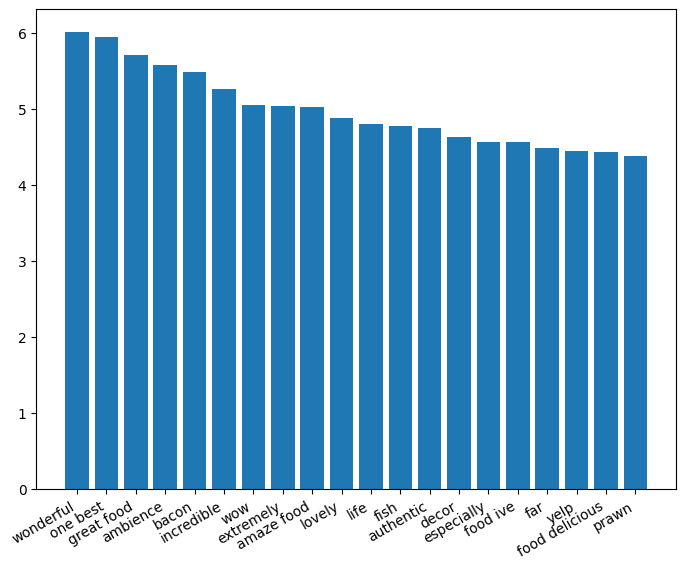

In [58]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
words = [tup[0] for tup in sorted_tfidf_list_pos]
scores = [tup[1] for tup in sorted_tfidf_list_pos]
ax.bar(words, scores)
plt.xticks(rotation=30, ha='right')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

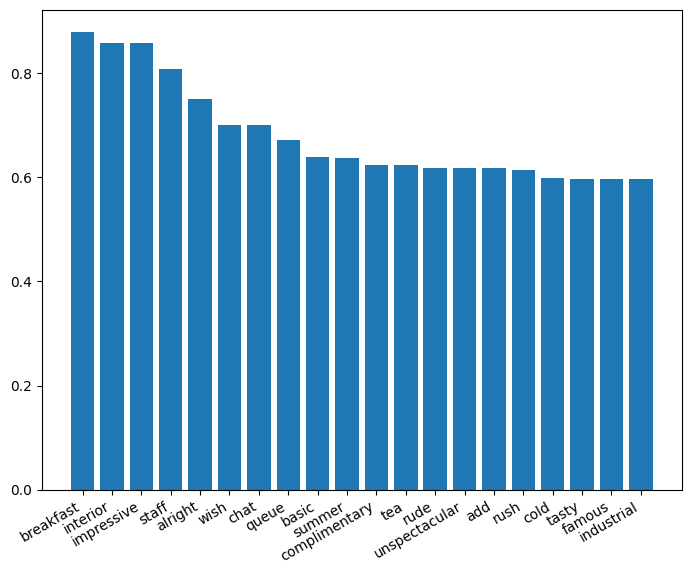

In [59]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
words = [tup[0] for tup in sorted_tfidf_list_neg]
scores = [tup[1] for tup in sorted_tfidf_list_neg]
ax.bar(words, scores)
plt.xticks(rotation=30, ha='right')
plt.show